In [1]:
from hgb_birth_effect_generation import *
from hgb_nn_sepsis_effect_generation import *
import matplotlib.pyplot as plt

In [2]:
import warnings

warnings.filterwarnings('ignore')

# First let's look at stillbirth because it is the most simple

In [3]:
sb_bop_rrs = load_bop_rrs("stillbirth")
sb_bop_rrs

,risk,draw_0,draw_1,draw_2,draw_3,draw_4,draw_5,draw_6,draw_7,draw_8,...,draw_241,draw_242,draw_243,draw_244,draw_245,draw_246,draw_247,draw_248,draw_249,outcome
0,49.597007,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,stillbirth
1,49.707521,0.997849,0.995643,0.998560,0.997293,0.997782,0.997954,0.996473,0.998735,0.996664,...,0.994375,0.996522,0.996781,0.997931,0.995933,0.997197,0.997691,0.997646,0.997577,stillbirth
2,49.818034,0.995698,0.991295,0.997119,0.994587,0.995564,0.995908,0.992950,0.997468,0.993333,...,0.988769,0.993050,0.993565,0.995862,0.991874,0.994397,0.995382,0.995292,0.995155,stillbirth
3,49.928548,0.993548,0.986957,0.995677,0.991882,0.993347,0.993862,0.989433,0.996200,0.990005,...,0.983183,0.989581,0.990353,0.993793,0.987823,0.991598,0.993073,0.992939,0.992733,stillbirth
4,50.039061,0.991397,0.982629,0.994235,0.989180,0.991129,0.991815,0.985920,0.994931,0.986682,...,0.977617,0.986118,0.987144,0.991723,0.983779,0.988801,0.990765,0.990587,0.990312,stillbirth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,159.557946,0.447423,0.195713,0.583800,0.363252,0.436331,0.465349,0.267173,0.623139,0.287084,...,0.121594,0.272206,0.299881,0.461339,0.218233,0.350539,0.421656,0.414651,0.404091,stillbirth
996,159.668459,0.447310,0.195613,0.583702,0.363137,0.436218,0.465238,0.267063,0.623047,0.286972,...,0.121514,0.272095,0.299768,0.461227,0.218129,0.350424,0.421542,0.414537,0.403977,stillbirth
997,159.778973,0.447198,0.195514,0.583603,0.363022,0.436105,0.465127,0.266952,0.622955,0.286860,...,0.121434,0.271985,0.299655,0.461116,0.218025,0.350309,0.421429,0.414423,0.403862,stillbirth
998,159.889486,0.447085,0.195414,0.583505,0.362907,0.435992,0.465016,0.266842,0.622863,0.286748,...,0.121355,0.271874,0.299543,0.461004,0.217922,0.350195,0.421315,0.414309,0.403748,stillbirth


In [4]:
exposure_levels = get_gbd_exposure_levels()
exposure_levels

array([ 40.     ,  40.11011,  40.22022,  40.33033,  40.44044,  40.55055,
        40.66066,  40.77077,  40.88088,  40.99099,  41.1011 ,  41.21121,
        41.32132,  41.43143,  41.54154,  41.65165,  41.76176,  41.87187,
        41.98198,  42.09209,  42.2022 ,  42.31231,  42.42242,  42.53253,
        42.64264,  42.75275,  42.86286,  42.97297,  43.08308,  43.19319,
        43.3033 ,  43.41341,  43.52352,  43.63363,  43.74374,  43.85385,
        43.96396,  44.07407,  44.18418,  44.29429,  44.4044 ,  44.51451,
        44.62462,  44.73473,  44.84484,  44.95495,  45.06507,  45.17518,
        45.28529,  45.3954 ,  45.50551,  45.61562,  45.72573,  45.83584,
        45.94595,  46.05606,  46.16617,  46.27628,  46.38639,  46.4965 ,
        46.60661,  46.71672,  46.82683,  46.93694,  47.04705,  47.15716,
        47.26727,  47.37738,  47.48749,  47.5976 ,  47.70771,  47.81782,
        47.92793,  48.03804,  48.14815,  48.25826,  48.36837,  48.47848,
        48.58859,  48.6987 ,  48.80881,  48.91892, 

In [5]:
sb_rrs = convert_rrs_to_gbd_exposure(sb_bop_rrs, exposure_levels)
sb_rrs

# great, we now go 40 to 150 instead of 49-160

,risk,draw_0,draw_1,draw_2,draw_3,draw_4,draw_5,draw_6,draw_7,draw_8,...,draw_240,draw_241,draw_242,draw_243,draw_244,draw_245,draw_246,draw_247,draw_248,draw_249
0,40.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,40.11011,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,40.22022,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,40.33033,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,40.44044,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,149.55956,0.457585,0.204834,0.592640,0.373671,0.446555,0.475397,0.277204,0.631424,0.297265,...,0.223368,0.128964,0.282279,0.310138,0.471414,0.227709,0.360952,0.431948,0.424971,0.414446
996,149.66967,0.457473,0.204732,0.592543,0.373556,0.446442,0.475287,0.277093,0.631333,0.297153,...,0.223263,0.128881,0.282167,0.310025,0.471303,0.227604,0.360837,0.431835,0.424857,0.414332
997,149.77978,0.457361,0.204631,0.592446,0.373441,0.446330,0.475176,0.276981,0.631243,0.297040,...,0.223158,0.128799,0.282056,0.309911,0.471192,0.227499,0.360722,0.431721,0.424744,0.414218
998,149.88989,0.457249,0.204529,0.592349,0.373326,0.446217,0.475066,0.276870,0.631152,0.296927,...,0.223054,0.128716,0.281944,0.309798,0.471081,0.227393,0.360607,0.431608,0.424630,0.414104


Text(0.5, 1.0, 'Stillbirth RR interpolation comparison')

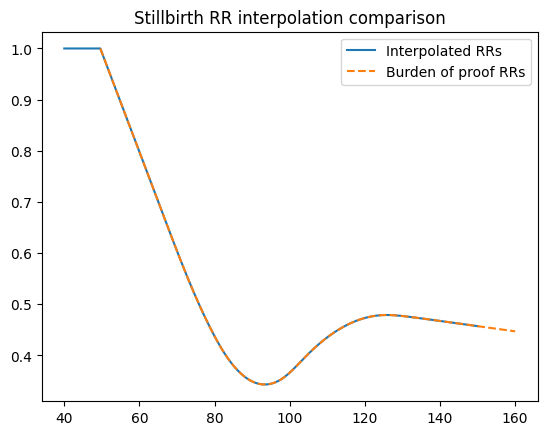

In [6]:
plt.plot(sb_rrs.risk, sb_rrs.draw_0, label='Interpolated RRs')
plt.plot(sb_bop_rrs.risk, sb_bop_rrs.draw_0, linestyle='--', label='Burden of proof RRs')
plt.legend()
plt.title('Stillbirth RR interpolation comparison')
# great, so we are appropriately replicating the burden of proof RRs
# and we are also not extrapolating beyond the bounds of the BoP data

In [7]:
# so now let's do the whole thing and scale to the effect of iv iron
iv_iron_sb_rrs = calculate_iv_iron_stillbirth_effects()
iv_iron_sb_rrs

draw,exposure,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_90,draw_91,draw_92,draw_93,draw_94,draw_95,draw_96,draw_97,draw_98,draw_99
0,40.00000,0.739146,0.541716,0.876159,0.760901,0.655889,0.609653,0.785516,0.566691,0.652192,...,0.669185,0.570053,0.664592,0.712950,0.653982,0.562164,0.630868,0.792946,0.686588,0.575822
1,40.11011,0.737006,0.538541,0.875049,0.758910,0.653241,0.606766,0.783700,0.563613,0.649524,...,0.666612,0.566989,0.661993,0.710640,0.651325,0.559068,0.628087,0.791184,0.684117,0.572782
2,40.22022,0.734867,0.535375,0.873937,0.756918,0.650597,0.603885,0.781882,0.560543,0.646859,...,0.664042,0.563933,0.659397,0.708331,0.648670,0.555980,0.625311,0.789421,0.681648,0.569750
3,40.33033,0.732728,0.532219,0.872823,0.754925,0.647956,0.601010,0.780064,0.557481,0.644198,...,0.661474,0.560884,0.656803,0.706024,0.646018,0.552899,0.622538,0.787656,0.679180,0.566725
4,40.44044,0.730588,0.529072,0.871708,0.752933,0.645317,0.598140,0.778244,0.554426,0.641540,...,0.658908,0.557843,0.654212,0.703717,0.643370,0.549827,0.619770,0.785890,0.676714,0.563707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,99.45946,1.315126,1.742920,1.127290,1.281002,1.465558,1.565941,1.244568,1.673160,1.473086,...,1.439143,1.664213,1.448154,1.358844,1.469429,1.685366,1.518140,1.233994,1.406043,1.649096
541,99.56957,1.312964,1.737115,1.126480,1.279099,1.462198,1.561730,1.242934,1.667996,1.469663,...,1.436001,1.659131,1.444937,1.356344,1.466037,1.680091,1.514339,1.232437,1.403169,1.644150
542,99.67968,1.310767,1.731224,1.125655,1.277163,1.458785,1.557453,1.241272,1.662755,1.466186,...,1.432808,1.653972,1.441670,1.353804,1.462591,1.674738,1.510478,1.230854,1.400248,1.639129
543,99.78979,1.308534,1.725250,1.124816,1.275197,1.455319,1.553113,1.239584,1.657438,1.462657,...,1.429566,1.648738,1.438352,1.351223,1.459093,1.669307,1.506559,1.229245,1.397282,1.634035


Text(0, 0.5, 'Relative Risk of Stillbirth (IV iron relative to none)')

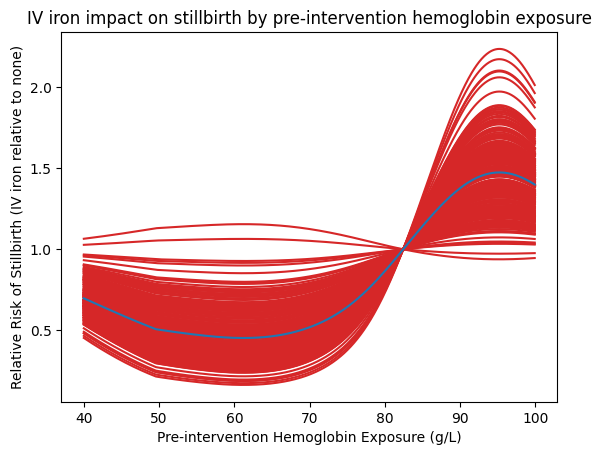

In [8]:
for col in [x for x in iv_iron_sb_rrs.columns if x.startswith("draw_")]:
    plt.plot(iv_iron_sb_rrs.exposure, iv_iron_sb_rrs[col], color='tab:red')
plt.plot(iv_iron_sb_rrs.exposure, iv_iron_sb_rrs.set_index('exposure').mean(axis=1), color='tab:blue', label='IV Iron Stillbirth RRs')
plt.title('IV iron impact on stillbirth by pre-intervention hemoglobin exposure')
plt.xlabel('Pre-intervention Hemoglobin Exposure (g/L)')
plt.ylabel('Relative Risk of Stillbirth (IV iron relative to none)')

# this looks weird but is as expected! 
    # the TMREL for stillbirth is ~95 g/L 
    # so starting at about 80 g/L hemoglobin, if someone gets IV iron, it will actually increase their risk of stillbirth
    # but if you start with hemoglobin exposure below 80 then IV iron will reduce your risk of stillbirth

# Great, now let's move on to LBWSG outcomes

In [9]:
ptb_rrs = load_prepped_rrs('ptb')
lbw_rrs = load_prepped_rrs('lbw')

In [10]:
ptb_rrs

draw,outcome,risk,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,...,draw_90,draw_91,draw_92,draw_93,draw_94,draw_95,draw_96,draw_97,draw_98,draw_99
0,ptb,40.00000,1.706413,1.730033,1.800402,1.975649,1.975675,1.976528,1.980696,1.981168,...,1.962813,1.964667,1.966087,1.967711,1.969599,1.969700,1.969867,1.971172,1.974528,1.975402
1,ptb,40.11011,1.705369,1.728948,1.799190,1.974110,1.974135,1.974986,1.979147,1.979618,...,1.961298,1.963148,1.964566,1.966187,1.968071,1.968172,1.968338,1.969641,1.972990,1.973863
2,ptb,40.22022,1.704325,1.727862,1.797978,1.972570,1.972596,1.973446,1.977598,1.978068,...,1.959783,1.961630,1.963045,1.964663,1.966543,1.966644,1.966810,1.968111,1.971453,1.972324
3,ptb,40.33033,1.703282,1.726777,1.796767,1.971031,1.971057,1.971905,1.976049,1.976518,...,1.958269,1.960112,1.961524,1.963139,1.965016,1.965116,1.965283,1.966581,1.969917,1.970786
4,ptb,40.44044,1.702238,1.725692,1.795556,1.969493,1.969518,1.970365,1.974501,1.974969,...,1.956755,1.958595,1.960004,1.961616,1.963489,1.963589,1.963755,1.965051,1.968380,1.969248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ptb,149.55956,1.170469,1.175218,1.189101,1.222083,1.222088,1.222244,1.223002,1.223088,...,1.219739,1.220079,1.220338,1.220635,1.220980,1.220998,1.221029,1.221267,1.221879,1.222038
996,ptb,149.66967,1.170225,1.174967,1.188828,1.221759,1.221764,1.221919,1.222676,1.222762,...,1.219418,1.219757,1.220017,1.220313,1.220657,1.220676,1.220706,1.220944,1.221555,1.221714
997,ptb,149.77978,1.169971,1.174705,1.188544,1.221420,1.221425,1.221580,1.222336,1.222422,...,1.219084,1.219422,1.219681,1.219977,1.220320,1.220339,1.220369,1.220607,1.221217,1.221375
998,ptb,149.88989,1.169706,1.174432,1.188247,1.221068,1.221072,1.221227,1.221982,1.222067,...,1.218735,1.219073,1.219331,1.219626,1.219970,1.219988,1.220018,1.220255,1.220864,1.221023


In [11]:
get_lbwsg_metadata().head()

,parameter,bw_start,bw_end,ga_start,ga_end
1450,cat10,500,1000,24,26
1451,cat106,1000,1500,36,37
1452,cat11,500,1000,26,28
1453,cat116,1000,1500,38,40
1454,cat117,1500,2000,38,40


In [12]:
exp_data = get_lbwsg_birth_exposure('ethiopia').head()
exp_data

,sex,year_start,year_end,parameter,bw_start,bw_end,ga_start,ga_end,draw,exposure,location
0,Female,2021,2022,cat10,500,1000,24,26,draw_0,0.000822,ethiopia
1,Female,2021,2022,cat10,500,1000,24,26,draw_1,0.000694,ethiopia
2,Female,2021,2022,cat10,500,1000,24,26,draw_2,0.000610,ethiopia
3,Female,2021,2022,cat10,500,1000,24,26,draw_3,0.000587,ethiopia
4,Female,2021,2022,cat10,500,1000,24,26,draw_4,0.000692,ethiopia


In [13]:
exposure_levels = get_gbd_exposure_levels()

In [14]:
draw = 'draw_0'

In [15]:
results_directory = os.getcwd() + '/'

In [16]:
calculate_and_save_lbwsg_shifts(results_directory, draw)

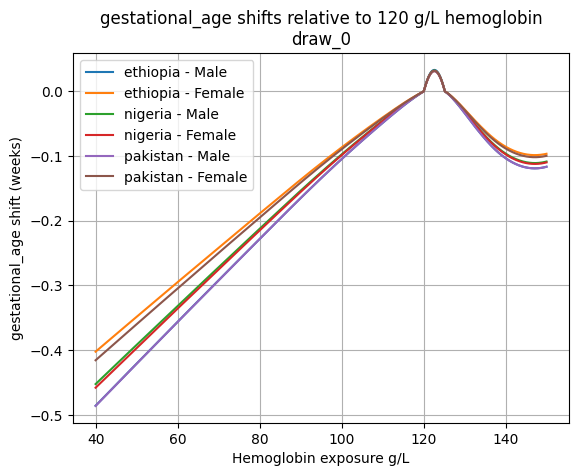

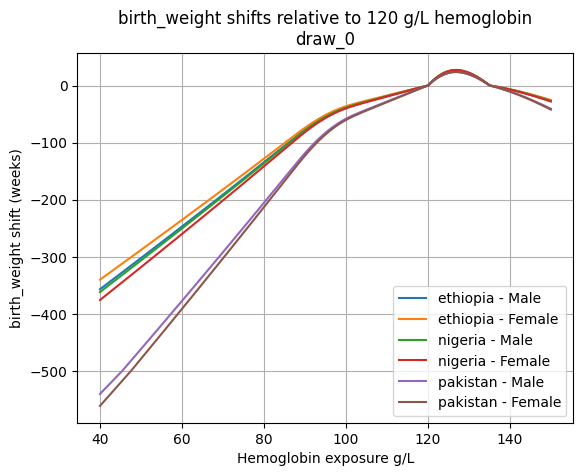

In [17]:
lbwsg_shifts = pd.read_csv(results_directory + f'lbwsg_shifts/{draw}.csv')
for outcome in ['gestational_age', 'birth_weight']:
    plt.figure()
    for location in lbwsg_shifts.location.unique():
        for sex in ['Male','Female']:
            p = lbwsg_shifts[(lbwsg_shifts.location == location) & (lbwsg_shifts.sex == sex) & (lbwsg_shifts.outcome == outcome)]
            plt.plot(p.exposure, p.value, label=f'{location} - {sex}')
    plt.title(f'{outcome} shifts relative to 120 g/L hemoglobin\n{draw}')
    plt.xlabel('Hemoglobin exposure g/L')
    plt.ylabel(f'{outcome} shift (weeks)')
    plt.legend()
    plt.grid()

In [18]:
# great! now scaled to IV iron
calculate_and_save_iv_iron_lbwsg_shifts(results_directory, draw)
iv_iron_shifts = pd.read_csv(results_directory + f'iv_iron_lbwsg_shifts/{draw}.csv')
iv_iron_shifts

,location,sex,draw,exposure,value,outcome
0,ethiopia,Female,draw_0,40.00000,120.666797,birth_weight
1,ethiopia,Female,draw_0,40.11011,120.680757,birth_weight
2,ethiopia,Female,draw_0,40.22022,120.694748,birth_weight
3,ethiopia,Female,draw_0,40.33033,120.708760,birth_weight
4,ethiopia,Female,draw_0,40.44044,120.722778,birth_weight
...,...,...,...,...,...,...
11995,pakistan,Male,draw_0,149.55956,NaN,gestational_age
11996,pakistan,Male,draw_0,149.66967,NaN,gestational_age
11997,pakistan,Male,draw_0,149.77978,NaN,gestational_age
11998,pakistan,Male,draw_0,149.88989,NaN,gestational_age


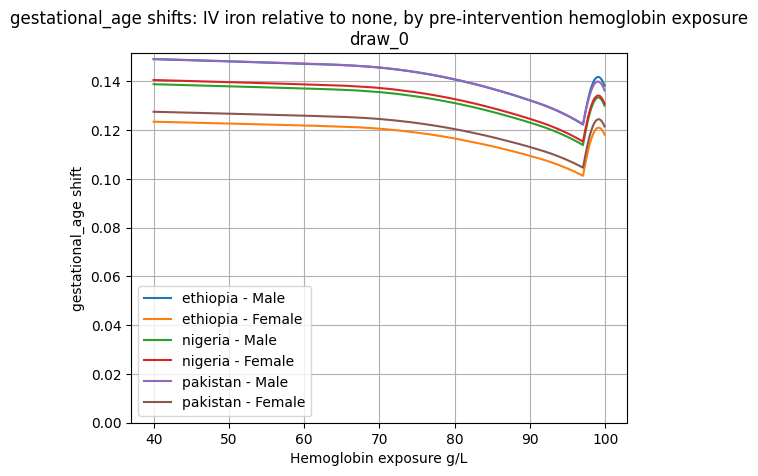

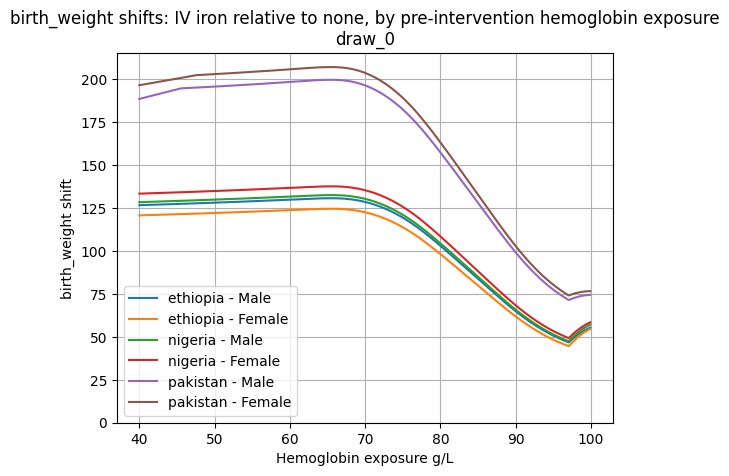

In [19]:
for outcome in ['gestational_age', 'birth_weight']:
    plt.figure()
    for location in iv_iron_shifts.location.unique():
        for sex in ['Male','Female']:
            p = iv_iron_shifts[(iv_iron_shifts.location == location) & (iv_iron_shifts.sex == sex) & (iv_iron_shifts.outcome == outcome)]
            plt.plot(p.exposure, p.value, label=f'{location} - {sex}')
    plt.title(f'{outcome} shifts: IV iron relative to none, by pre-intervention hemoglobin exposure\n{draw}')
    plt.xlabel('Hemoglobin exposure g/L')
    plt.ylabel(f'{outcome} shift')
    plt.legend()
    plt.ylim(ymin=0)
    plt.grid()

# Ok, now let's do the sepsis effects

In [4]:
total_effects = load_prepped_rrs('neonatal_sepsis')

In [ ]:
draws = [150, 249]
results_directory = os.getcwd() 
for draw in draws:
    calculate_and_save_lbwsg_shifts(results_directory + '/', f'draw_{draw}')
    calculate_direct_effect(results_directory, 'ethiopia', draw)

2025-08-22 12:07:16.039 | INFO     | simulation_1-artifact_manager:78 - Running simulation from artifact located at /mnt/team/simulation_science/pub/models/vivarium_gates_mncnh/artifacts/model13.1/ethiopia.hdf.
2025-08-22 12:07:16.043 | INFO     | simulation_1-artifact_manager:79 - Artifact base filter terms are ['draw == 150'].
2025-08-22 12:07:16.044 | INFO     | simulation_1-artifact_manager:80 - Artifact additional filter terms are None.
2025-08-22 12:07:22.570 | WARNING  | simulation_1-results_manager:439 - Specified excluded stratifications are already not included by default: ['stillbirth', 'partial_term']
2025-08-22 12:07:22.572 | WARNING  | simulation_1-results_manager:439 - Specified excluded stratifications are already not included by default: ['stillbirth', 'partial_term']
2025-08-22 12:07:22.767 | INFO     | simulation_1-results_manager:127 - The following stratifications are registered but not used by any observers: 
['sex']
2025-08-22 12:24:57.528 | INFO     | simulation

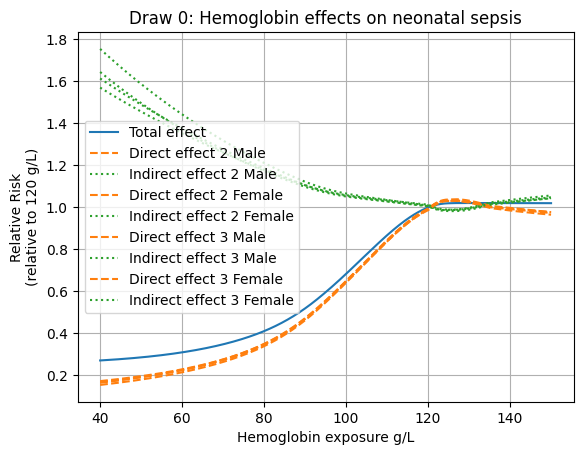

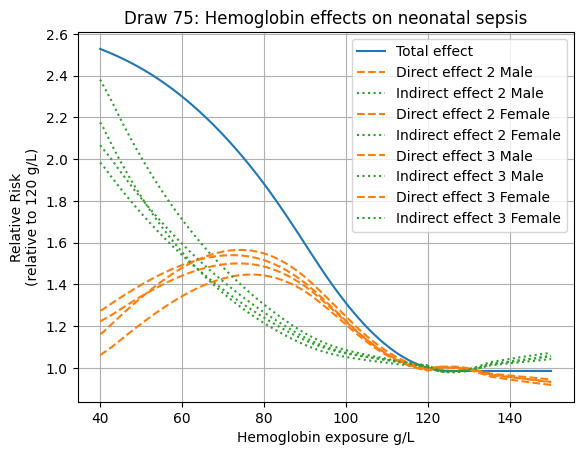

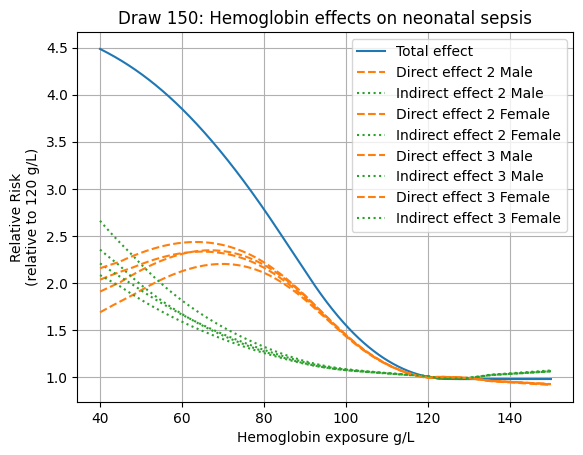

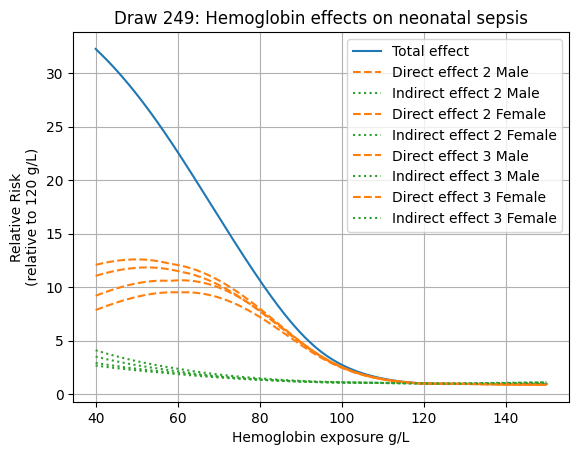

In [5]:
for draw in [0, 75, 150, 249]:
    plt.figure()
    direct_effect = pd.read_csv(os.getcwd() + f'/direct_sepsis_effects/draw_{draw}.csv')
    total_effect = total_effects[['risk',f'draw_{draw}']]
    plt.plot(total_effect['risk'], total_effect[f'draw_{draw}'], label=f'Total effect')
    for age_group_id in [2,3]:
        for sex in ['Male','Female']:
            p = direct_effect.loc[(direct_effect['age_group_id'] == age_group_id) & (direct_effect['sex_of_child'] == sex)].reset_index()
            plt.plot(p.exposure, p[f'value'], label=f'Direct effect {age_group_id} {sex}', linestyle='dashed', color='tab:orange')
            plt.plot(p.exposure, total_effect[f'draw_{draw}'] / p['value'], label=f'Indirect effect {age_group_id} {sex}', linestyle='dotted', color='tab:green')
            
    plt.legend()
    plt.grid()
    plt.title(f'Draw {draw}: Hemoglobin effects on neonatal sepsis')
    plt.xlabel('Hemoglobin exposure g/L')
    plt.ylabel('Relative Risk\n(relative to 120 g/L)')